- Components of Time Series:
   - Trend: long-term increase or decrease.
   - Seasonality: repeating short-term cycle (e.g., daily, monthly).
   - Cyclic: longer-term cycles (not as regular as seasonality).
   - Noise: random variation.



ADF Statistic: 0.8153688792060547
p-value: 0.9918802434376411


c:\Users\ashik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ashik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ashik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ashik\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Fri, 18 Apr 2025   AIC                           1353.347
Time:                        17:28:58   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.057      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.418      0.000      -0.989      -0.921
ma.L1         -1.8432      0.125    -14.752      0.0

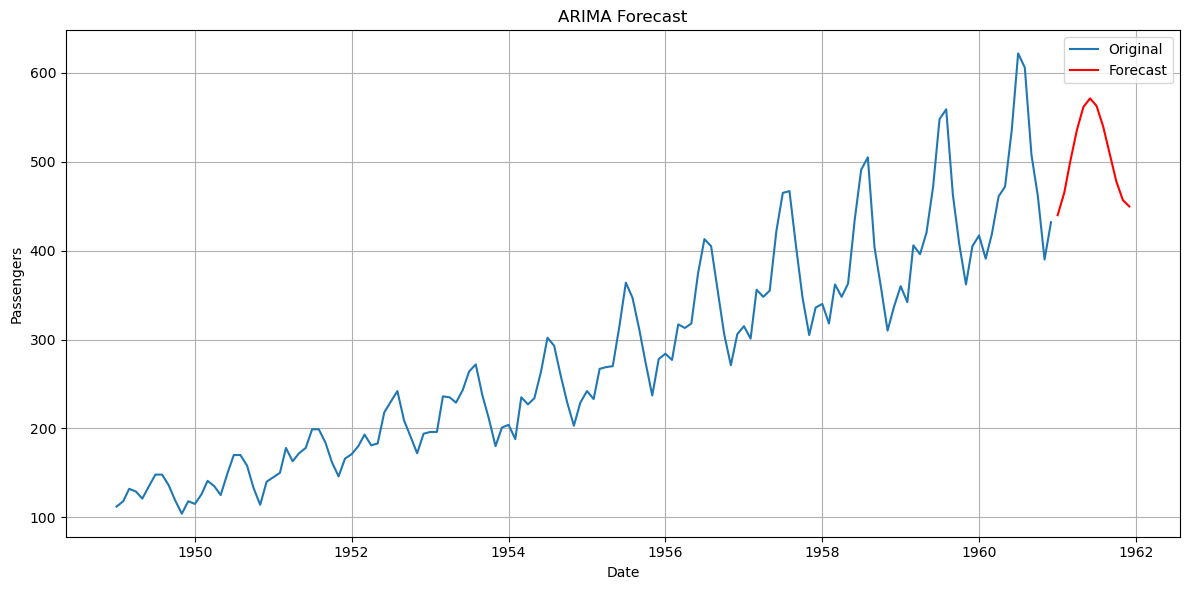

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load example time series (monthly airline passengers)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Optional: check stationarity
result = adfuller(df['Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If p-value > 0.05, data is non-stationary → use d=1 or d=2

# Fit ARIMA model: ARIMA(p, d, q)
model = ARIMA(df['Passengers'], order=(2, 1, 2))  # Try tuning p,d,q later
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecasting: predict next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Plotting
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Passengers'], label='Original')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='MS')[1:], forecast, label='Forecast', color='red')
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


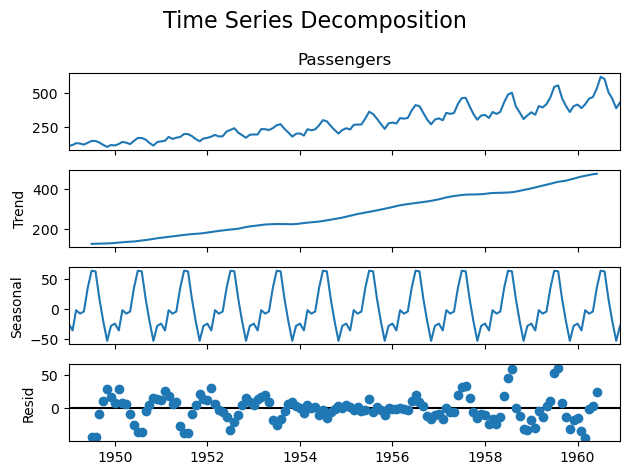

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Decompose the time series
decomposition = seasonal_decompose(df['Passengers'], model='additive')  # or model='multiplicative'

# Plot each component
decomposition.plot()
plt.suptitle("Time Series Decomposition", fontsize=16)
plt.tight_layout()
plt.show()


In [3]:
# First-order differencing
df['diff1'] = df['Passengers'] - df['Passengers'].shift(1)

# Drop NaNs and re-check stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['diff1'].dropna())
print(f'ADF after differencing: {result[0]}, p-value: {result[1]}')


ADF after differencing: -2.829266824170004, p-value: 0.05421329028382491


ADF Statistic: 0.8153688792060547
p-value: 0.9918802434376411
Applied first-order differencing.


c:\Users\ashik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ashik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ashik\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ashik\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


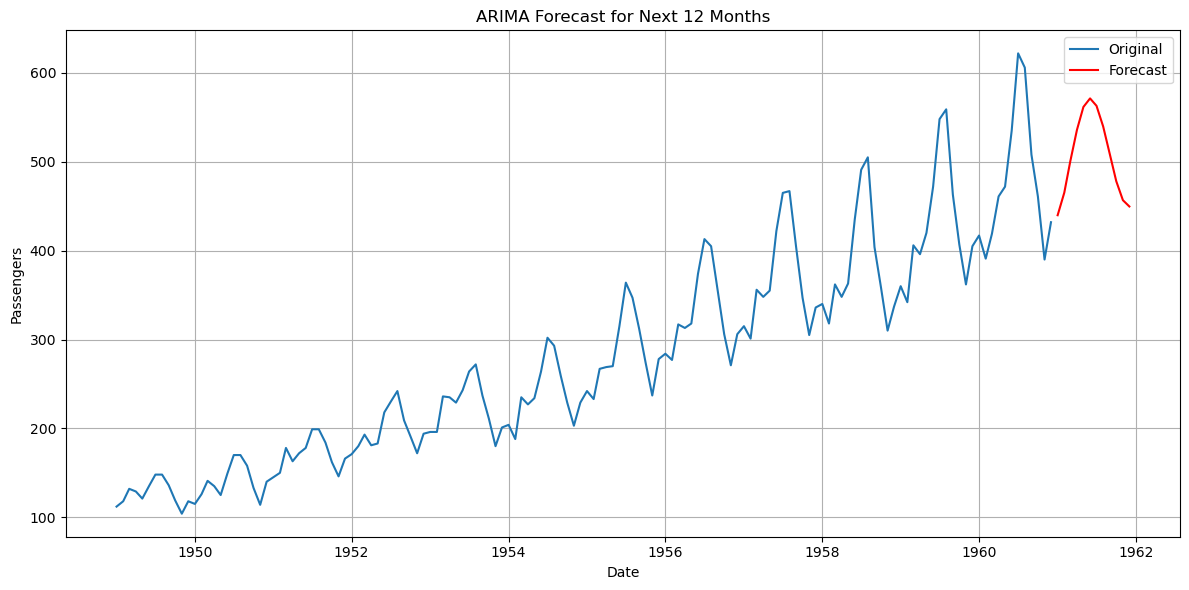

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load the data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
series = df['Passengers']

# Check stationarity using ADF test
adf_result = adfuller(series)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# If p > 0.05, apply first-order differencing
if adf_result[1] > 0.05:
    series_diff = series.diff().dropna()
    print("Applied first-order differencing.")
else:
    series_diff = series

# Fit ARIMA model (p=2, d=1, q=2) - you can tune this
model = ARIMA(series, order=(2, 1, 2))  # d=1 because we differenced once
model_fit = model.fit()

# Forecast 12 steps into the future
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Create forecast date range
forecast_index = pd.date_range(start=series.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')

# Plot
plt.figure(figsize=(12,6))
plt.plot(series, label='Original')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title("ARIMA Forecast for Next 12 Months")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
